In [ ]:
from numpy import zeros, ones
from numpy.random import randn, randint
from tensorflow.keras.layers import Dense, Conv2D, Conv2DTranspose, Concatenate, Flatten, LeakyReLU, Embedding, Reshape, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
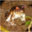

In [ ]:
x_train[0]

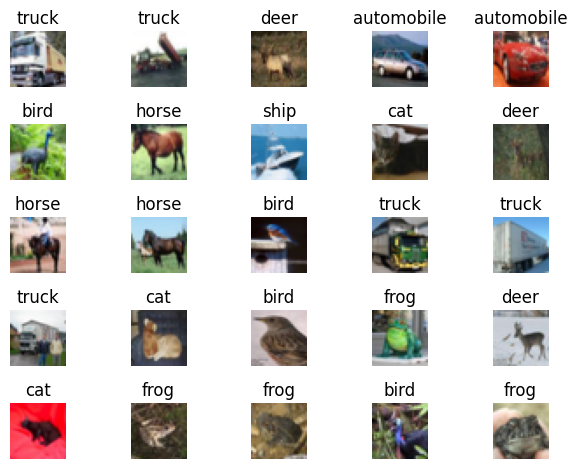

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.imshow(x_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def discrimnator(input_shape=(32, 32, 3), n_class = 10):

    in_label = Input(shape = (1, ))
    embed_in_label = Embedding(n_class, 50)(in_label)

    n_nueron = input_shape[0] * input_shape[1]

    label = Dense(n_nueron)(embed_in_label)
    label_reshape = Reshape((32, 32, 1))(label)

    in_image = Input(shape=input_shape)
    img_label = Concatenate()([in_image, label_reshape])

    img_label = Conv2D(128, (3, 3), padding="same")(img_label)
    img_label = LeakyReLU(0.2)(img_label)

    img_label = Conv2D(128, (3, 3), padding="same")(img_label)
    img_label = LeakyReLU(0.2)(img_label)

    flat = Flatten()(img_label)
    out_img = Dropout(0.4)(flat)

    out_image = Dense(1, activation='sigmoid')(out_img)

    model = Model([in_image, in_label], out_image)

    opt_model = Adam(0.0002, beta_1 = 0.5)
    model.compile(optimizer=opt_model, loss="binary_crossentropy", metrics = ['accuracy'])

    return model

In [ ]:
dis_model = discrimnator()
dis_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 50)          │            500 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1, 1024)        │         52,224 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 32, 32, 1)      │              0 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 32, 32, 4)      │              0 │ input_layer_1[0][0],   │
│                           │                        │                │ reshape[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 32, 32, 128)    │          4,736 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 32, 32, 128)    │              0 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 32, 32, 128)    │        147,584 │ leaky_re_lu[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 32, 32, 128)    │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 131072)         │              0 │ leaky_re_lu_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 131072)         │              0 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │        131,073 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 336,117 (1.28 MB)

 Trainable params: 336,117 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def generator(latent_dim, n_class=10):
    # Label input
    in_label = Input(shape=(1,))
    embed_in_label = Embedding(n_class, 50)(in_label)

    # Dense layer to match image shape for label
    n_neurons = 8 * 8  # 8x8 spatial size
    label = Dense(n_neurons)(embed_in_label)
    label_reshape = Reshape((8, 8, 1))(label)

    # Latent space input
    in_latent = Input(shape=(latent_dim,))
    n_neurons = 128 * 8 * 8
    latent_dense = Dense(n_neurons)(in_latent)
    latent_dense = LeakyReLU(0.2)(latent_dense)
    in_img_reshape = Reshape((8, 8, 128))(latent_dense)

    # Concatenate label and latent image
    img_label = Concatenate()([in_img_reshape, label_reshape])

    # Upsampling layers to reach 32x32
    up_scale = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(img_label)  # 16x16x128
    acti_img = LeakyReLU(0.2)(up_scale)

    up_scale = Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same')(acti_img)  # 32x32x128
    acti_img = LeakyReLU(0.2)(up_scale)

    # Final layer to reduce to 3 channels (for RGB) with (32, 32, 3)
    out_img = Conv2D(3, (3, 3), activation='tanh', padding='same')(acti_img)  # Output shape: (32, 32, 3)

    # Define and return the model
    model = Model([in_latent, in_label], out_img)

    return model


In [ ]:

gen_model = generator(100, n_class=10)
gen_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 8192)           │        827,392 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 50)          │            500 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 8192)           │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1, 64)          │          3,264 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 8, 8, 128)      │              0 │ leaky_re_lu_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 8, 8, 1)        │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 8, 8, 129)      │              0 │ reshape_2[0][0],       │
│ (Concatenate)             │                        │                │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 128)    │        264,320 │ concatenate_1[0][0]    │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 16, 16, 128)    │              0 │ conv2d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 32, 32, 128)    │        262,272 │ leaky_re_lu_3[0][0]    │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_4 (LeakyReLU) │ (None, 32, 32, 128)    │              0 │ conv2d_transpose_1[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 3)      │          3,459 │ leaky_re_lu_4[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,361,207 (5.19 MB)

 Trainable params: 1,361,207 (5.19 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def gan(dis_model, gen_model):
    dis_model.trainable = False

    in_img, in_label = gen_model.input
    out_img = gen_model.output

    gan_out = dis_model([out_img, in_label])

    model = Model([in_img, in_label], gan_out)
    opt = Adam(0.0002, beta_1=0.5)

    model.compile(optimizer = opt, loss='binary_crossentropy')

    return model

In [ ]:
gan_model = gan(dis_model, gen_model)
gan_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 100)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 8192)           │        827,392 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 50)          │            500 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_2 (LeakyReLU) │ (None, 8192)           │              0 │ dense_3[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1, 64)          │          3,264 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 8, 8, 128)      │              0 │ leaky_re_lu_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 8, 8, 1)        │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 8, 8, 129)      │              0 │ reshape_2[0][0],       │
│ (Concatenate)             │                        │                │ reshape_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 16, 16, 128)    │        264,320 │ concatenate_1[0][0]    │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_3 (LeakyReLU) │ (None, 16, 16, 128)    │              0 │ conv2d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_1        │ (None, 32, 32, 128)    │        262,272 │ leaky_re_lu_3[0][0]    │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_4 (LeakyReLU) │ (None, 32, 32, 128)    │              0 │ conv2d_transpose_1[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 32, 32, 3)      │          3,459 │ leaky_re_lu_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ functional (Functional)   │ (None, 1)              │        336,117 │ conv2d_2[0][0],        │
│                           │                        │                │ input_layer_2[0][0]    │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,697,324 (6.47 MB)

 Trainable params: 1,361,207 (5.19 MB)

 Non-trainable params: 336,117 (1.28 MB)

In [ ]:
def load_real_img():
    (x_train, y_train), (_,_) = load_data()

    x_train = x_train.astype('float32')
    x_train = (x_train - 127.5) / 127.5

    return [x_train, y_train]

In [ ]:
def generate_real_img(img_data, batch):

    x_train, y_train = img_data

    img_inx = randint(0, x_train.shape[0], batch)

    x_train, y_train = x_train[img_inx], y_train[img_inx]

    true_img_label = ones((batch, 1))

    return [x_train, y_train], true_img_label

In [ ]:
def generate_latent_noise(latent, batch, labels=10):

    latent_noise = randn(latent*batch)

    latent_noise = latent_noise.reshape(batch, latent)

    random_labels = randint(0, labels, batch)

    return [latent_noise, random_labels]

In [ ]:
def generate_fake_img(gen_model, latent_noise, batch):

    latent_noise, random_labels = generate_latent_noise(latent, batch)

    gen_img = gen_model.predict([latent_noise, random_labels])

    gen_labels = zeros((batch, 1))

    return [gen_img, random_labels], gen_labels

In [ ]:
import psutil
from keras import backend as K

def train(gen_model, dis_model, gan_model, img_data, latent, epochs=25, batch=64):
    bat_per_epo = int(img_data[0].shape[0] / batch)
    half_batch = int(batch / 2)

    for epoch in range(epochs):
        for bat in range(bat_per_epo):
            [x_train, y_train], true_img_label = generate_real_img(img_data, half_batch)
            d_loss_real, _ = dis_model.train_on_batch([x_train, y_train], true_img_label)

            [gen_img, random_labels], gen_labels = generate_fake_img(gen_model, latent, batch)
            d_loss_fake, _ = dis_model.train_on_batch([gen_img, random_labels], gen_labels)

            [latent_noise, random_labels] = generate_latent_noise(latent, batch, labels=10)
            fake_img_labels = ones((batch, 1))

            gan_loss = gan_model.train_on_batch([latent_noise, random_labels], fake_img_labels)

            # Clear unused variables
            del x_train, y_train, true_img_label, gen_img, random_labels, gen_labels, latent_noise

            print("RAM usage: ", psutil.virtual_memory().percent)

        # Clear session after each epoch
        K.clear_session()

        print('Epoch>%d, Batch>%d, d1=%.3f, d2=%.3f g=%.3f' % (epoch + 1, bat_per_epo, d_loss_real, d_loss_fake, gan_loss))

    gen_model.save('cifar_conditional_generator_2epochs.h5')


In [ ]:
latent = 100
img_data = load_real_img()
train(gen_model, dis_model, gan_model, img_data, latent, epochs = 2)

/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
RAM usage:  23.8
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


RAM usage:  23.9
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  24.0
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  24.1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  24.1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  24.3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  24.5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RAM usage:  24.6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RAM usage:  24.7
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RAM usage:  24.8
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RAM usage:  24.9
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
RAM usage:  25.1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  25.1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  25.1
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  25.2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  25.3
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  25.4
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage:  25.5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RAM usage:  25.6
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
RAM usage: